# 第2部　Pythonによる時系列分析の基本

## 第6章　時系列データのシミュレーションと見せかけの回帰

### 分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 正規ホワイトノイズ系列のシミュレーション

In [3]:
# 乱数の種
np.random.seed(1)
# 正規分布に従う乱数の生成
stats.norm.rvs(loc=0, scale=1, size=4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

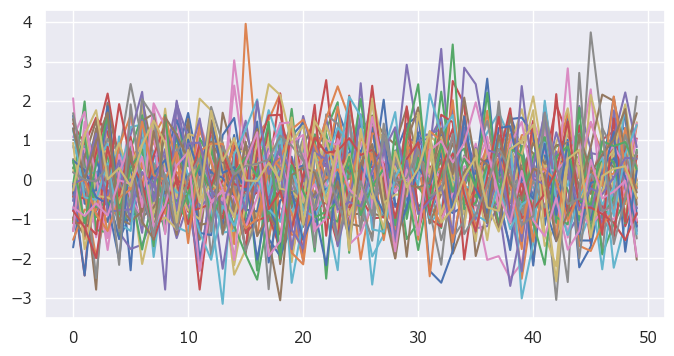

In [4]:
# 生成する系列の数
n_sim = 50

# 乱数の種
np.random.seed(1)

# 正規ホワイトノイズ系列の作成と可視化
for i in range(1, n_sim):
    hn = stats.norm.rvs(loc=0, scale=1, size=50)
    sns.lineplot(x = range(0, 50), y=hn)

### ランダムウォーク系列のシミュレーション

In [5]:
# 乱数の種
np.random.seed(1)
# 正規分布に従う乱数の累積和を作成し、ランダムウォーク系列を作る
np.cumsum(stats.norm.rvs(loc=0, scale=1, size=4))

array([ 1.62434536,  1.01258895,  0.4844172 , -0.58855142])

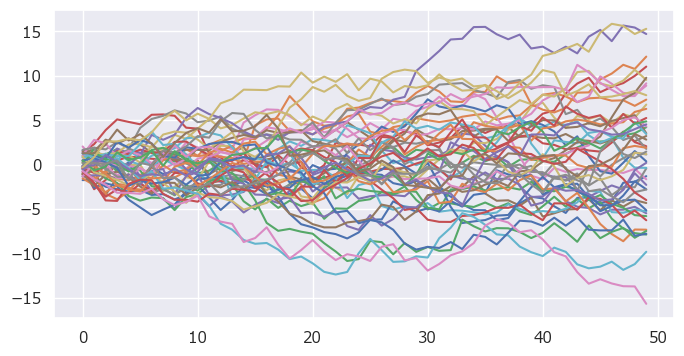

In [6]:
# 生成する系列の数
n_sim = 50

# 乱数の種
np.random.seed(1)

# ランダムウォーク系列の作成と可視化
for i in range(1, n_sim):
    rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    sns.lineplot(x = range(0, 50), y=rw)

### 正規ホワイトノイズ系列への線形回帰分析

#### 回帰直線

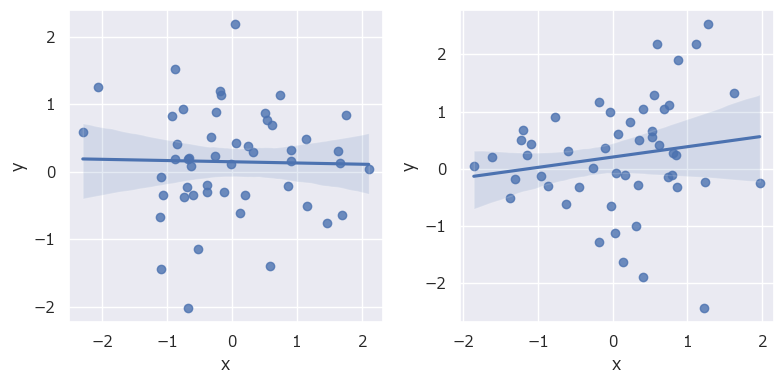

In [7]:
# 乱数の種
np.random.seed(1)

# 2列のグラフを作る
fig, ax = plt.subplots(figsize=(8, 4), ncols=2, tight_layout=True)

# 正規ホワイトノイズ系列を2つ作って、回帰直線を図示する
for i in range(0, 2):
    # シミュレーションデータの作成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)
    data_sim = pd.DataFrame({"x":x,"y":y})

    # 回帰直線
    sns.regplot(x='x', y='y', data=data_sim, ax=ax[i])

### F比の分布

In [8]:
# シミュレーションの回数
n_sim = 1000

# F比を保存する入れ物
f_ratio_array = np.zeros(n_sim)

# シミュレーションの実施
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの作成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)
    data_sim = pd.DataFrame({"x":x,"y":y})
    
    # 回帰分析の実行
    lm_model_sim = smf.ols(formula='y ~ x', data=data_sim).fit()
    
    # F比の取得
    f_ratio_array[i] = lm_model_sim.fvalue

In [9]:
# 参考：モデルの自由度(群間変動の自由度)
lm_model_sim.df_model

1.0

In [10]:
# 残差の自由度(群内変動の自由度)
lm_model_sim.df_resid

48.0

<Axes: xlabel='x', ylabel='Density'>

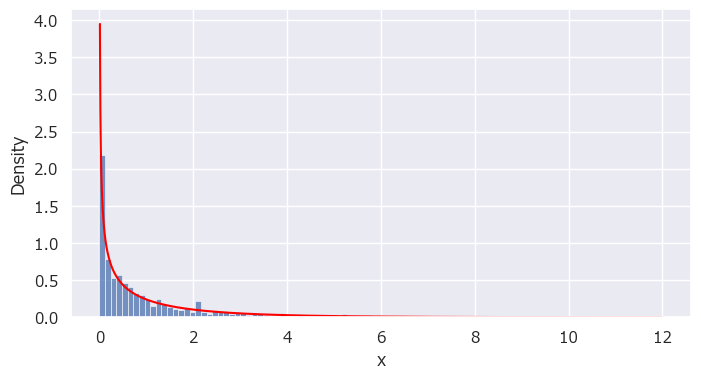

In [11]:
# F比のヒストグラム
sns.histplot(f_ratio_array, stat="density", bins=100)

# F分布の折れ線グラフ
f_df = pd.DataFrame({'x':np.arange(0, 12, 0.01)})
f_df['density'] = stats.f.pdf(f_df.x, dfn=1, dfd=48)
sns.lineplot(x='x', y='density', data=f_df, color='red')

#### F検定

In [12]:
# F分布の95％点
stats.f.ppf(q=0.95, dfn=1, dfd=48)

4.042652128566653

In [13]:
# 間違って帰無仮説を棄却してしまう確率
sum(f_ratio_array > stats.f.ppf(q=0.95, dfn=1, dfd=48)) / n_sim

0.046

### ランダムウォーク系列への回帰分析

#### 回帰直線

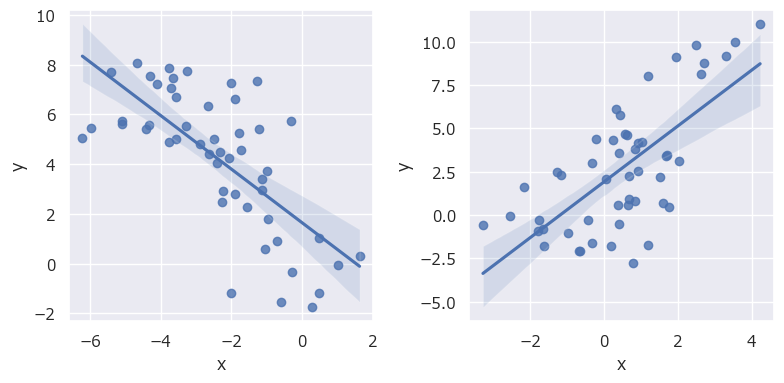

In [14]:
# 乱数の種
np.random.seed(1)

# 2列のグラフを作る
fig, ax = plt.subplots(figsize=(8, 4), ncols=2, tight_layout=True)

# ランダムウォーク系列を2つ作って、回帰直線を図示する
for i in range(0, 2):
    # シミュレーションデータの作成
    x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    data_sim = pd.DataFrame({"x":x_rw, "y":y_rw})

    # 散布図
    sns.regplot(x='x', y='y', data=data_sim, ax=ax[i])

#### F比の分布

In [15]:
# シミュレーションの回数
n_sim = 1000

# F比を保存する入れ物
f_ratio_array_rw = np.zeros(n_sim)

# シミュレーションの実施
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの作成
    x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
    data_sim = pd.DataFrame({"x":x_rw, "y":y_rw})
    
    # 回帰分析の実行
    lm_model_sim = smf.ols(formula='y ~ x', data=data_sim).fit()
    
    # F比の取得
    f_ratio_array_rw[i] = lm_model_sim.fvalue

<Axes: ylabel='Density'>

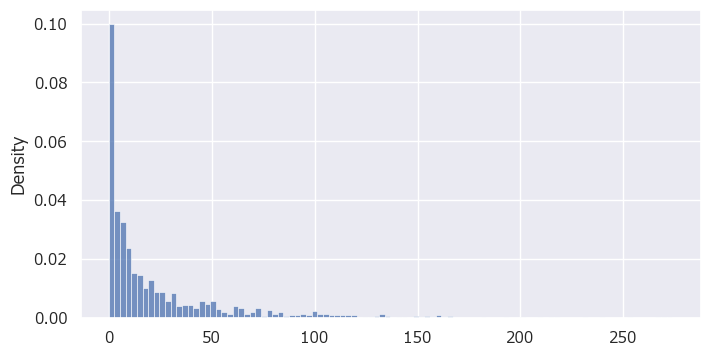

In [16]:
# F比のヒストグラム
sns.histplot(f_ratio_array_rw, stat="density", bins=100)

#### ゆがんだ標本分布と見せかけの回帰

In [17]:
# 間違って帰無仮説を棄却してしまう確率
sum(f_ratio_array_rw > stats.f.ppf(q=0.95, dfn=1, dfd=48)) / n_sim

0.668

### 回帰係数のばらつき

#### シミュレーションの実施

In [18]:
# シミュレーションの回数
n_sim = 1000

# 回帰係数を保存する入れ物
coef_array    = np.zeros(n_sim)
coef_array_rw = np.zeros(n_sim)

# Durbin-Watson統計量を保存する入れ物
dw_array    = np.zeros(n_sim)
dw_array_rw = np.zeros(n_sim)

# シミュレーションの実施
np.random.seed(1)
for i in range(1, n_sim):
    # シミュレーションデータの生成
    x = stats.norm.rvs(loc=0, scale=1, size=50)
    y = stats.norm.rvs(loc=0, scale=1, size=50)
    data_sim    = pd.DataFrame({"x":x,           "y":y})    
    data_sim_rw = pd.DataFrame({"x":np.cumsum(x),"y":np.cumsum(y)})
    
    # モデル化
    lm_model_sim    = smf.ols(formula='y ~ x', data=data_sim   ).fit()
    lm_model_sim_rw = smf.ols(formula='y ~ x', data=data_sim_rw).fit()
    
    # 回帰係数の格納
    coef_array[i]    = lm_model_sim.params['x']
    coef_array_rw[i] = lm_model_sim_rw.params['x']
    
    # Durbin-Watson統計量の格納
    dw_array[i]    = sm.stats.stattools.durbin_watson(lm_model_sim.resid)
    dw_array_rw[i] = sm.stats.stattools.durbin_watson(lm_model_sim_rw.resid)

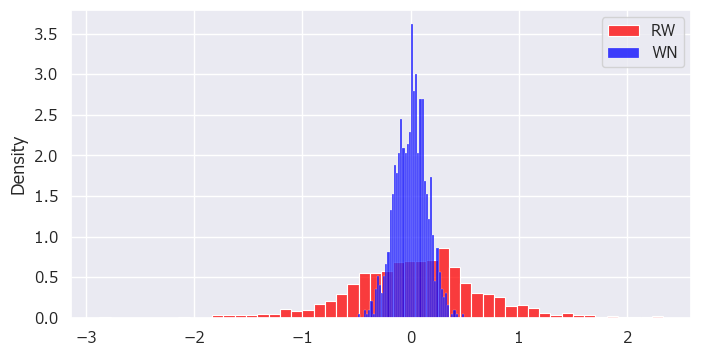

In [19]:
# 回帰係数のヒストグラム
sns.histplot(coef_array_rw, stat="density", label='RW', bins=50, color='red')
sns.histplot(coef_array,    stat="density", label='WN', bins=50, color='blue')

# 凡例
plt.legend()

In [20]:
print('正規ホワイトノイズ系列の回帰係数', np.mean(coef_array))
print('ランダムウォーク系列の回帰係数　', np.mean(coef_array_rw))

正規ホワイトノイズ系列の回帰係数 0.0040539533426812305
ランダムウォーク系列の回帰係数　 0.04061012928383667


### Durbin-Watson統計量

#### 実装

In [21]:
# シミュレーションデータの生成
np.random.seed(1)
x_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
y_rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=50))
data_rw_sim = pd.DataFrame({"x":x_rw, "y":y_rw})

# モデルの構築
lm_model = smf.ols(formula='y ~ x', data=data_rw_sim).fit()

# 結果の確認
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     47.70
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.02e-08
Time:                        16:40:54   Log-Likelihood:                -104.41
No. Observations:                  50   AIC:                             212.8
Df Residuals:                      48   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.466      3.518      0.0

In [22]:
# Durbin-Watson統計量の取得
sm.stats.stattools.durbin_watson(lm_model.resid)

0.4189076267042925

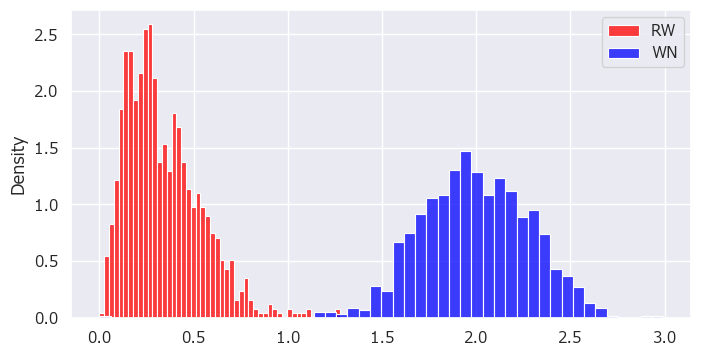

In [23]:
# Durbin-Watson統計量のヒストグラム
sns.histplot(dw_array_rw, stat="density", label='RW', bins=50, color='red')
sns.histplot(dw_array,    stat="density", label='WN', bins=50, color='blue')

# 凡例
plt.legend()